# Mathematically modelling Graziani’s circuit according to Steve Keen

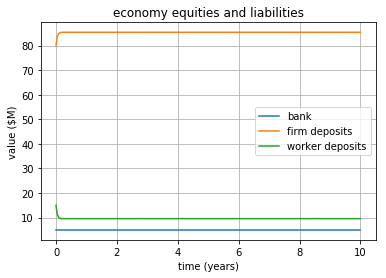

During year 10, in $M:
lend = 0.000
repay = 0.000
cons_w = 239.215
cons_b = 5.000
interests = 5.000
wages = 239.208
increase in bank = 0.000
increase in firms = 0.007
increase in workers = -0.007
increase in loans = 0.000

Alain's GDP for year 10:
GDP = 244.215
Costs = 244.208
Net profits = 0.007
Net profits, share of GDP = 0.00272%
Wages, share of GDP = 97.95%
Interests, share of GDP = 2.05%

Steve's GDP for year 10:
GDP = 341.726
Costs = 244.208
Net profits = 97.518
Net profits, share of GDP = 28.53684%
Wages, share of GDP = 70.00%
Interests, share of GDP = 1.46%


In [23]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def economy_derivative(t, economy):
    lend = economy[0]
    repay = economy[1]
    cons_w = economy[2]
    cons_b = economy[3]
    interests = economy[4]
    wages = economy[5]
    bank = economy[6]
    firms = economy[7]
    workers = economy[8]
    loans = economy[9]
    steve_gdp = economy[10]

    tau_t = 0.25
    lend_r = 1 / 7
    repay_r = 1 / 7
    cons_w_r = 1 / 0.04
    cons_b_r = 1.0
    wages_r = (1 - 0.3) / tau_t
    r_l = 0.05
    
    d_lend = lend * lend_r
    d_repay = lend * repay_r
    d_cons_w = workers * cons_w_r
    d_cons_b = bank * cons_b_r
    d_interests = loans * r_l
    d_wages = firms * wages_r
    d_steve_gdp = firms / tau_t
    
    d_bank = d_interests - d_cons_b
    d_firms = d_lend + d_cons_w + d_cons_b - (d_wages + d_interests + d_repay)
    d_workers = d_wages - d_cons_w
    d_loans = d_lend - d_repay
    
    return [d_lend, d_repay, d_cons_w, d_cons_b, d_interests, d_wages, d_bank, d_firms, d_workers, d_loans, d_steve_gdp]

economy0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 80.0, 15.0, 100.0, 0.0]

sol = solve_ivp(economy_derivative, [0, 10], economy0, max_step = 1.0, dense_output=True)

plt.title('economy equities and liabilities')
plt.plot(sol.t, sol.y[6], label='bank')
plt.plot(sol.t, sol.y[7], label='firm deposits')
plt.plot(sol.t, sol.y[8], label='worker deposits')
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

economy = sol.sol(10)

income = economy - sol.sol(9)

print('During year 10, in $M:')
print('lend = %.3f' % income[0])
print('repay = %.3f' % income[1])
print('cons_w = %.3f' % income[2])
print('cons_b = %.3f' % income[3])
print('interests = %.3f' % income[4])
print('wages = %.3f' % income[5])
print('increase in bank = %.3f' % income[6])
print('increase in firms = %.3f' % income[7])
print('increase in workers = %.3f' % income[8])
print('increase in loans = %.3f' % income[9])
print()

print('Alain\'s GDP for year 10:')
gdp = income[2] + income[3]
print('GDP = %.3f' % gdp)
costs = income[4] + income[5]
print('Costs = %.3f' % costs)
net_profits = gdp - costs
print('Net profits = %.3f' % net_profits)
print('Net profits, share of GDP = %.5f%%' % (100 * net_profits / gdp))
print('Wages, share of GDP = %.2f%%' % (100 * income[5] / gdp))
print('Interests, share of GDP = %.2f%%' % (100 * income[4] / gdp))
print()

print('Steve\'s GDP for year 10:')
gdp = income[10]
print('GDP = %.3f' % gdp)
costs = income[4] + income[5]
print('Costs = %.3f' % costs)
net_profits = gdp - costs
print('Net profits = %.3f' % net_profits)
print('Net profits, share of GDP = %.5f%%' % (100 * net_profits / gdp))
print('Wages, share of GDP = %.2f%%' % (100 * income[5] / gdp))
print('Interests, share of GDP = %.2f%%' % (100 * income[4] / gdp))
